In [1]:
import tensorflow as tf
import sys
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))
print(sys.version)

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]


In [3]:
class_dict = {0:"cat",1:"dog"}

In [4]:
(X1_train,Y1_train),(X1_test,Y1_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X1_train.shape

(50000, 32, 32, 3)

In [6]:
Y1_train.shape

(50000, 1)

In [7]:
Y1_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
X1_test.shape

(10000, 32, 32, 3)

In [9]:
Y1_test.shape

(10000, 1)

In [10]:
Y1_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
train_idxs , test_idxs = list(),list()

In [12]:
for i,label in enumerate(Y1_train):
    if label == 3 or label == 5:
        train_idxs.append(i)

In [13]:
len(train_idxs)

10000

In [14]:
train_idxs

[9,
 17,
 21,
 26,
 27,
 33,
 36,
 38,
 39,
 40,
 51,
 56,
 59,
 70,
 74,
 78,
 80,
 81,
 83,
 91,
 101,
 107,
 128,
 141,
 142,
 148,
 150,
 156,
 157,
 159,
 167,
 169,
 173,
 174,
 177,
 182,
 183,
 195,
 197,
 198,
 203,
 207,
 215,
 217,
 229,
 239,
 241,
 251,
 253,
 258,
 260,
 266,
 277,
 285,
 287,
 297,
 305,
 314,
 315,
 324,
 331,
 333,
 334,
 337,
 339,
 342,
 359,
 367,
 370,
 374,
 377,
 380,
 384,
 395,
 416,
 424,
 426,
 431,
 445,
 446,
 450,
 462,
 471,
 476,
 479,
 491,
 494,
 500,
 515,
 517,
 534,
 535,
 542,
 548,
 550,
 569,
 573,
 583,
 597,
 603,
 607,
 618,
 624,
 629,
 638,
 639,
 653,
 670,
 675,
 678,
 681,
 684,
 685,
 686,
 691,
 697,
 702,
 717,
 726,
 729,
 730,
 732,
 734,
 740,
 750,
 751,
 762,
 767,
 774,
 776,
 784,
 785,
 788,
 792,
 801,
 805,
 806,
 809,
 813,
 814,
 817,
 839,
 845,
 846,
 850,
 851,
 852,
 853,
 857,
 861,
 865,
 869,
 875,
 878,
 882,
 894,
 895,
 908,
 918,
 919,
 922,
 928,
 932,
 941,
 944,
 949,
 955,
 969,
 981,
 984,
 

In [15]:
Y1_train[27]

array([5], dtype=uint8)

In [16]:
for i,label in enumerate(Y1_test):
    if label == 3 or label == 5:
        test_idxs.append(i)

In [17]:
len(test_idxs)

2000

In [18]:
test_idxs

[0,
 8,
 12,
 16,
 24,
 31,
 33,
 39,
 42,
 46,
 53,
 61,
 63,
 68,
 77,
 78,
 85,
 91,
 101,
 103,
 106,
 115,
 121,
 127,
 128,
 141,
 143,
 148,
 155,
 158,
 168,
 176,
 178,
 181,
 184,
 187,
 190,
 200,
 205,
 207,
 212,
 224,
 230,
 232,
 238,
 239,
 245,
 250,
 251,
 256,
 262,
 271,
 273,
 275,
 277,
 279,
 294,
 302,
 318,
 319,
 320,
 321,
 323,
 327,
 332,
 336,
 343,
 345,
 356,
 361,
 367,
 389,
 397,
 399,
 412,
 418,
 421,
 426,
 431,
 432,
 434,
 437,
 438,
 444,
 446,
 453,
 456,
 457,
 460,
 464,
 467,
 470,
 474,
 478,
 483,
 484,
 488,
 502,
 510,
 514,
 515,
 518,
 520,
 525,
 533,
 544,
 549,
 550,
 551,
 553,
 558,
 565,
 573,
 579,
 586,
 597,
 598,
 599,
 601,
 607,
 608,
 614,
 631,
 637,
 639,
 640,
 641,
 646,
 649,
 650,
 652,
 664,
 669,
 671,
 673,
 676,
 679,
 688,
 690,
 695,
 699,
 715,
 716,
 727,
 729,
 739,
 749,
 760,
 768,
 779,
 786,
 790,
 792,
 810,
 811,
 817,
 819,
 825,
 828,
 829,
 831,
 834,
 845,
 862,
 863,
 866,
 870,
 874,
 878,
 882,


In [19]:
Y1_test[16]

array([5], dtype=uint8)

In [20]:
X_train = X1_train[train_idxs]

In [21]:
X_train.shape

(10000, 32, 32, 3)

In [22]:
Y_train = Y1_train[train_idxs]

In [23]:
Y_train = Y_train.squeeze()

In [24]:
Y_train = pd.Series(Y_train).map({3:0,5:1})

In [25]:
Y_train

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    0
9999    1
Length: 10000, dtype: int64

In [26]:
Y_train.shape

(10000,)

In [27]:
X_test = X1_test[test_idxs]

In [28]:
X_test.shape

(2000, 32, 32, 3)

In [29]:
Y_test = Y1_test[test_idxs]

In [30]:
Y_test = Y_test.squeeze()

In [31]:
Y_test

array([3, 3, 5, ..., 3, 3, 5], dtype=uint8)

In [32]:
Y_test = pd.Series(Y_test).map({3:0,5:1})

In [33]:
Y_test

0       0
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    0
1999    1
Length: 2000, dtype: int64

In [34]:
Y_test.shape

(2000,)

In [35]:
model_V0 = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                                tf.keras.layers.Rescaling(1.0/255.0),
                                tf.keras.layers.Conv2D(10,kernel_size=3,activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2),
                                tf.keras.layers.Conv2D(10,kernel_size=3,activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=3,activation="relu"),
                                tf.keras.layers.MaxPool2D(pool_size=2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1,activation="sigmoid") 
])

In [36]:
model_V0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 10)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 10)        910       
                                                        

In [37]:
model_V0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [38]:
model_V0.fit(X_train,Y_train,validation_data=(X_test,Y_test),validation_batch_size=32,batch_size=32,epochs=100)

Epoch 1/100
313/313 [==============================] - 17s 6ms/step - loss: 0.6767 - accuracy: 0.5613 - val_loss: 0.6671 - val_accuracy: 0.6130
Epoch 2/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6290 - accuracy: 0.6489 - val_loss: 0.6139 - val_accuracy: 0.6565
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5920 - accuracy: 0.6809 - val_loss: 0.5822 - val_accuracy: 0.6910
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5704 - accuracy: 0.7008 - val_loss: 0.5676 - val_accuracy: 0.7110
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5515 - accuracy: 0.7193 - val_loss: 0.5638 - val_accuracy: 0.7030
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5388 - accuracy: 0.7224 - val_loss: 0.5464 - val_accuracy: 0.7285
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.5278 - accuracy: 0.7344 - val_loss: 0.5362 - val_accuracy: 0.729

Epoch 58/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2955 - accuracy: 0.8677 - val_loss: 0.5726 - val_accuracy: 0.7765
Epoch 59/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2929 - accuracy: 0.8707 - val_loss: 0.6441 - val_accuracy: 0.7540
Epoch 60/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2905 - accuracy: 0.8725 - val_loss: 0.5864 - val_accuracy: 0.7650
Epoch 61/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2937 - accuracy: 0.8738 - val_loss: 0.5766 - val_accuracy: 0.7650
Epoch 62/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2860 - accuracy: 0.8729 - val_loss: 0.5619 - val_accuracy: 0.7800
Epoch 63/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2872 - accuracy: 0.8730 - val_loss: 0.5965 - val_accuracy: 0.7705
Epoch 64/100
313/313 [==============================] - 2s 5ms/step - loss: 0.2827 - accuracy: 0.8758 - val_loss: 0.5607 - val_accuracy:

In [82]:
model_V0.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 6ms/step - loss: 0.7062 - accuracy: 0.7440


[0.7061583399772644, 0.7440000176429749]

In [88]:
model_V0.predict(X_test)

63/63 [==============================] - 0s 4ms/step


array([[0.00311673],
       [0.00861066],
       [0.9506288 ],
       ...,
       [0.13179219],
       [0.89116335],
       [0.9990288 ]], dtype=float32)

In [86]:
import random

random.sample(range(10),k=1)

[7]

In [90]:
round(0.3)

0

In [135]:
import random
import matplotlib.pyplot as plt


def plot_prediction(model,X,Y):
    choice = random.sample(range(len(X)),k=1)
    image = X[choice]
    label = Y[choice]
    pred_prob = float(model.predict(image).squeeze())
    pred = round(pred_prob)
    fig,ax = plt.subplots(1,figsize=(2,2))
    ax.imshow(image.squeeze())
    ax.set_title(f"Actual:-{class_dict[int(label)]}\nPredicted:-{class_dict[pred]}\nPrediction Probs:-{round(pred_prob*100,2)}")
    ax.set_axis_off()

1/1 [==============================] - 0s 16ms/step


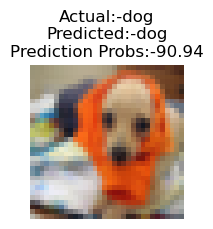

In [141]:
plot_prediction(model_V0,X_test,Y_test)